# QN-4(1) 

size of array 262144
average of squared dierence= 6.29342768029e+29


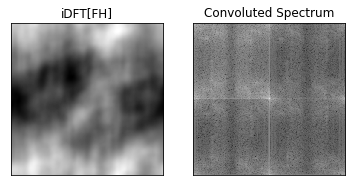

In [37]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)

dftF = np.fft.fft2(imgF)                                      #fast fourier transformation for F
dftH = np.fft.fft2(imgH)                                       #fast fourier transformation fro H


final_ifft = dftF*dftH                                            #    FH


f_ishift = np.fft.ifftshift(final_ifft)                             # shifting
print("size of array", np.size(f_ishift))
d_shift_FH = np.array(np.dstack([f_ishift.real,f_ishift.imag]))      # real and imaginary   
img_back_FH = cv2.idft(d_shift_FH)                                   # iDFT[FH]
imgFH = cv2.magnitude(img_back_FH[:,:,0],img_back_FH[:,:,1])         


con = signal.fftconvolve(dftF,dftH ,mode='full')                      #    convolution f*h
#print(con)
#print(np.size(con))
final_con = 20*np.log(np.abs(con))                                         # log scaled 
#print(np.size(final_con))
error = 0
for i in range(0,512):                                                # finding error 
    for j in range(0,512):
        error+=  (imgFH[i][j] - final_con[i+255][j+255]) ** 2

error = error/262144
print("average of squared dierence=",error)


plt.subplot(121),plt.imshow(imgFH, cmap = 'gray')
plt.title('iDFT[FH]'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final_con, cmap = 'gray')
plt.title('Convoluted Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

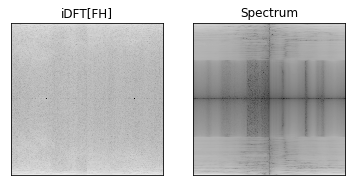

In [61]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)

dftF = np.fft.fft2(imgF) #fast fourier transformation
fshift_F = np.fft.fftshift(dftF) # shifting to center
#final_F = 20*np.log(np.abs(fshift_F)) # log scaled
f_ishift_F = np.fft.ifft(fshift_F) # taking inverse FFT



dftH = np.fft.fft2(imgH) #fast fourier transformation
fshift_H = np.fft.fftshift(dftH) # shifting to center
#final_H = 20*np.log(np.abs(fshift_H)) # log scaled
f_ishift_H = np.fft.ifft(fshift_H)

final_ifft = f_ishift_H*f_ishift_F
d_shift_FH = np.fft.fftshift(final_ifft) # shifting to center
imgFH = 20*np.log(np.abs(d_shift_FH)) # log scaled

#f_ishift = np.fft.ifftshift(fshift)
#d_shift_FH = np.array(np.dstack([final_ifft.real,final_ifft.imag]))
#img_back_FH = cv2.idft(d_shift_FH)
#imgFH = cv2.magnitude(img_back_FH[:,:,0],img_back_FH[:,:,1])


con = signal.fftconvolve(f_ishift_F,f_ishift_H,mode='full')
#print(con)
#print(np.size(con))
fshift = np.fft.fftshift(con) # shifting to center
final = 20*np.log(np.abs(fshift)) # log scaled 

plt.subplot(121),plt.imshow(imgFH, cmap = 'gray')
plt.title('iDFT[FH]'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

1046529


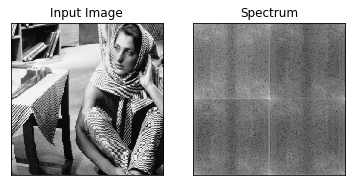

In [3]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)
dftF = np.fft.fft2(imgF) #fast fourier transformation
dftH = np.fft.fft2(imgH) #fast fourier transformation
con = signal.fftconvolve(dftF,dftH,mode='full')
#print(con)
#print(np.size(con))
#fshift = np.fft.fftshift(con) # shifting to center
final = 20*np.log(np.abs(con)) # log scaled 

plt.subplot(121),plt.imshow(imgF, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
number1 = 1046529
number2 = 262144
sq_root = number2 ** 0.5
print(sq_root)


512.0


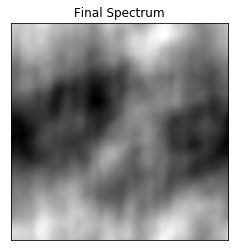

In [37]:
import cv2
import numpy as np

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)
F = np.fft.fft2(imgF)
H = np.fft.fft2(imgH)
F_H = F*H
#print(np.size(F_H))
fshift = np.fft.fftshift(F_H)
f_ishift = np.fft.ifftshift(fshift)
d_shift = np.array(np.dstack([f_ishift.real,f_ishift.imag]))
img_back = cv2.idft(d_shift)
img = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
                  
plt.subplot(111),plt.imshow(img, cmap = 'gray')
plt.title('Final Spectrum'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(final, cmap = 'gray')
#plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.show()                 

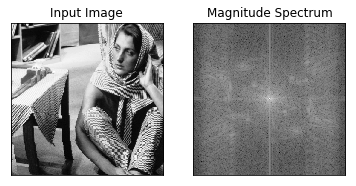

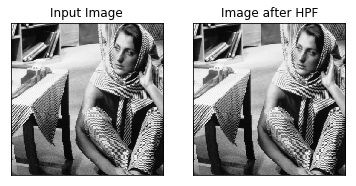

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('barbara_gray.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])


plt.show()

# both the resulting images are different so the convolution and iDFT are not same

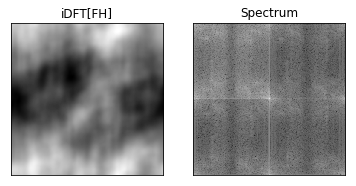

In [11]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)

dftF = np.fft.fft2(imgF) #fast fourier transformation for F
dftH = np.fft.fft2(imgH) #fast fourier transformation fro H


final_ifft = dftF*dftH #    FH


f_ishift = np.fft.ifftshift(final_ifft)                             # shifting
d_shift_FH = np.array(np.dstack([f_ishift.real,f_ishift.imag]))      # real and imaginary   
img_back_FH = cv2.idft(d_shift_FH)                                   # iDFT
imgFH = cv2.magnitude(img_back_FH[:,:,0],img_back_FH[:,:,1])         


con = signal.fftconvolve(dftF,dftH ,mode='full') #    convolution f*h
#print(con)
#print(np.size(con))
final = 20*np.log(np.abs(con)) # log scaled 

plt.subplot(121),plt.imshow(imgFH, cmap = 'gray')
plt.title('iDFT[FH]'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

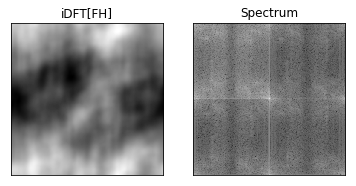

In [12]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)

dftF = np.fft.fft2(imgF)                                      #fast fourier transformation for F
dftH = np.fft.fft2(imgH)                                       #fast fourier transformation fro H


final_ifft = dftF*dftH                                            #    FH


f_ishift = np.fft.ifftshift(final_ifft)                             # shifting
d_shift_FH = np.array(np.dstack([f_ishift.real,f_ishift.imag]))      # real and imaginary   
img_back_FH = cv2.idft(d_shift_FH)                                   # iDFT
imgFH = cv2.magnitude(img_back_FH[:,:,0],img_back_FH[:,:,1])         


con = signal.fftconvolve(dftF,dftH ,mode='full')                      #    convolution f*h
#print(con)
#print(np.size(con))
final = 20*np.log(np.abs(con))                                         # log scaled 

plt.subplot(121),plt.imshow(imgFH, cmap = 'gray')
plt.title('iDFT[FH]'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

size of array 262144
average of squared dierence= 6.29342768029e+29


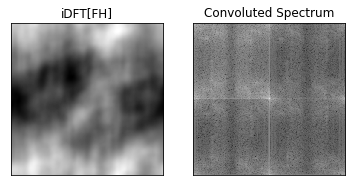

In [36]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgF = cv2.imread('barbara_gray.bmp',0)
imgH = cv2.imread('zelda.bmp',0)

dftF = np.fft.fft2(imgF)                                      #fast fourier transformation for F
dftH = np.fft.fft2(imgH)                                       #fast fourier transformation fro H


final_ifft = dftF*dftH                                            #    FH


f_ishift = np.fft.ifftshift(final_ifft)                             # shifting
print("size of array", np.size(f_ishift))
d_shift_FH = np.array(np.dstack([f_ishift.real,f_ishift.imag]))      # real and imaginary   
img_back_FH = cv2.idft(d_shift_FH)                                   # iDFT[FH]
imgFH = cv2.magnitude(img_back_FH[:,:,0],img_back_FH[:,:,1])         


con = signal.fftconvolve(dftF,dftH ,mode='full')                      #    convolution f*h
#print(con)
#print(np.size(con))
final_con = 20*np.log(np.abs(con))                                         # log scaled 
#print(np.size(final_con))
error = 0
for i in range(0,512):                                                # finding error 
    for j in range(0,512):
        error+=  (imgFH[i][j] - final_con[i+255][j+255]) ** 2

error = error/262144
print("average of squared dierence=",error)


plt.subplot(121),plt.imshow(imgFH, cmap = 'gray')
plt.title('iDFT[FH]'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final_con, cmap = 'gray')
plt.title('Convoluted Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
number1 = 1046529
number2 = 262144
sq_root1 = number1 ** 0.5
sq_root2 = number2 ** 0.5
print(sq_root1,sq_root2)


1023.0 512.0
